# Sanjay Avva - Project III | Finished Ver
## Date: 12/16/25

### This project analyzes data from the 2024 StackOverFlow Developer Survey to identify meaningful trends across digital industries in relation to the developer expierence (Job, Language Favorites, Industry, etc).

##### Note: I left some of the sample() selectors uncollapsed because they show the differences happening, even though they are lengthy;


## Addt. Resources used:
### - Matplotlib docs (https://matplotlib.org/), help with styling syntax
### - Pandas docs (https://pandas.pydata.org/docs/), understanding exploded rows
### - Google Gemini, used to generate MatplotlibCM color maps (see code comment)
### - Intro to Python for Computer Science and Data Science, Textbook
### - https://survey.stackoverflow.co/, CSV Source

### Importing Pandas Library for Data Processing:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

### Read in df from .csv
#### Column names are fine and are already short enough

In [ ]:
df = pd.read_csv("survey_results_public.csv")
df.head()

### Keep only columns relevant to questions:
1) Which languages do developers most want to learn, what language has the most equal desire-admire rate
2) Are certain industries strongly associated with specific programming languages
3) Which programming languages are associated with the highest salaries among survey respondents?
4) Which languages have the strongest overlap with high job satisfaction?
5) How do language preferences change after 5, 10, or 20+ years of coding? (thinking about excluding this)

In [4]:
df = df[['ResponseId','LanguageHaveWorkedWith','LanguageWantToWorkWith','LanguageAdmired','Industry','ConvertedCompYearly','CompTotal','JobSat','YearsCode','YearsCodePro']]

In [ ]:
df.sample()

### Turn all NaNs in Laungauges worked with into empty str (the resoponder skipped over the question, since all question resp were optional)

In [6]:
df["LanguageHaveWorkedWith"] = df["LanguageHaveWorkedWith"].fillna("") #applied to all langauge-related cols
df["LanguageWantToWorkWith"] = df["LanguageWantToWorkWith"].fillna("")
df["LanguageAdmired"] = df["LanguageAdmired"].fillna("")

In [ ]:
df.head()

### Turned strings of Language sep by ; into lists for easier data processing)

In [8]:
lang_cols = ["LanguageHaveWorkedWith","LanguageWantToWorkWith","LanguageAdmired"]

for col in lang_cols:
    df[col] = df[col].str.split(";") #using ; delimiter

In [ ]:
df.sample()

### Convert all industry col NaNs to Unknown

In [10]:
df["Industry"] = df["Industry"].fillna("Unknown")

In [ ]:
df.head()

In [ ]:
df.sample()

### Kept all NaNs in global df because did not want to shrink data by a large margin (as seen in milestone 3, there are a lot of NaNs), but created 3 seperate dfs where NaNs are dropped case-by-case. I will use each respective df for each question in the final project to create and compute visualizations.

In [13]:
salary_df = df.dropna(subset=["ConvertedCompYearly"])
salary_df = salary_df.dropna(subset=["CompTotal"])
jobsat_df = df.dropna(subset=["JobSat"])
exp_df = df.dropna(subset=["YearsCodePro"])
exp_df = exp_df.dropna(subset=["YearsCode"])



# MILESTONE IV STARTS HERE

### Answering Question 3: Which programming languages are associated with the highest salaries among survey respondents?



In [ ]:
salary_df.head()

In [15]:
#split column list content into special rows with each indiv item of ea list item
salary_df_exploded = salary_df.explode("LanguageHaveWorkedWith")
#get rid of empty lists
salary_df_exploded = salary_df_exploded[(salary_df_exploded["LanguageHaveWorkedWith"] != "") ]

salary_by_language = (
    salary_df_exploded
    .groupby("LanguageHaveWorkedWith")["ConvertedCompYearly"]
    .mean()
    .sort_values(ascending=False)
) #aggregation that groups laungauges with salary, sorts those pairs high to low by salary

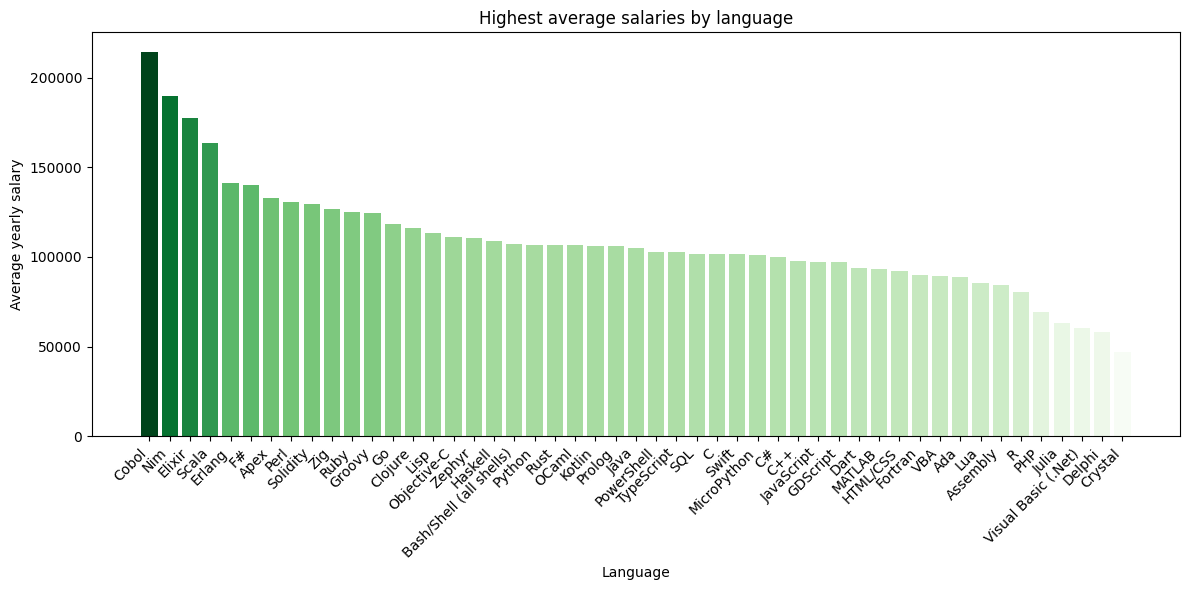

In [16]:
top = salary_by_language.head(50) #grab 50 most high-paying languages
x = np.arange(len(top)) #x-axis pts

norm = (top - top.min()) / (top.max() - top.min() + 1e-9) #maps salaries into green binry graidents
colors = plt.cm.Greens(norm.values)

plt.figure(figsize=(12, 6)) #plot styling
plt.bar(x, top.values, color=colors)
plt.xticks(x, top.index, rotation=45, ha="right")
plt.xlabel("Language")
plt.ylabel("Average yearly salary")
plt.title("Highest average salaries by language")
plt.tight_layout()
plt.show()

In [17]:
for i, (lang, sal) in enumerate(salary_by_language.items()):
    print(f"{i+1}. {lang}: ${sal}") #CLI presentation

1. Cobol: $214497.2857142857
2. Nim: $190000.0
3. Elixir: $177620.54545454544
4. Scala: $163463.95652173914
5. Erlang: $141203.0
6. F#: $140162.875
7. Apex: $132818.45454545456
8. Perl: $130836.26666666666
9. Solidity: $129405.33333333333
10. Zig: $126708.0
11. Ruby: $125042.04615384615
12. Groovy: $124501.82222222222
13. Go: $118610.57647058823
14. Clojure: $115985.25
15. Lisp: $113269.85714285714
16. Objective-C: $111250.72727272728
17. Zephyr: $110628.5
18. Haskell: $109046.66666666667
19. Bash/Shell (all shells): $107022.45658263305
20. Python: $106926.00631578948
21. Rust: $106770.04081632652
22. OCaml: $106631.0
23. Kotlin: $106274.24096385542
24. Prolog: $106263.33333333333
25. Java: $104838.34468085106
26. PowerShell: $103018.05325443787
27. TypeScript: $102839.82397959183
28. SQL: $101813.2387218045
29. C: $101805.15584415584
30. Swift: $101497.07692307692
31. MicroPython: $101141.11111111111
32. C#: $100078.3953488372
33. C++: $97612.4010989011
34. JavaScript: $97139.06375838

## Verdict: Objective-C (not c), Crystal, Elixir,  Erlang and Zig are among the languages associated with high average salary. Interesting that more niche and unpopular laungauges are at the top while common languages are towards the middle.

### Answering Question 4: Which languages have the strongest overlap with high job satisfaction?


In [ ]:
jobsat_df.head()

In [19]:
#split job list content into special rows with each indiv item of ea list item
jobsat_df_exploded = jobsat_df.explode("LanguageHaveWorkedWith")
#get rid of empty lists
jobsat_df_exploded = jobsat_df_exploded[(jobsat_df_exploded["LanguageHaveWorkedWith"] != "")]

jobsat_by_language = (
    jobsat_df_exploded
    .groupby("LanguageHaveWorkedWith")["JobSat"]
    .mean()
    .sort_values(ascending=False)
) #aggregation that groups languages with job satisfation, sorts those pairs high to low by jobsat

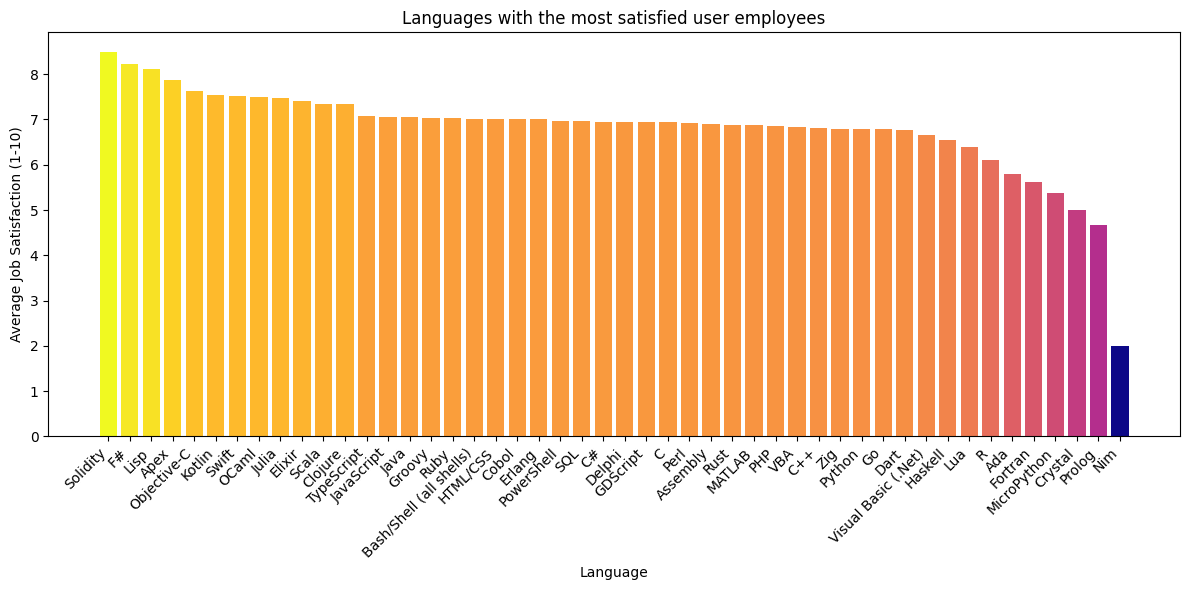

In [20]:
top20 = jobsat_by_language.head(50) #top 50 happpiest language user types
x = np.arange(len(top20)) #x-axis

norm = (top20 - top20.min()) / (top20.max() - top20.min() + 1e-9) #gradient mapping to plasma colorway
colors = plt.cm.plasma(norm.values)

plt.figure(figsize=(12,6)) #plot+styling
plt.bar(x, top20.values, color=colors)
plt.xticks(x, top20.index, rotation=45, ha="right")
plt.xlabel("Language")
plt.ylabel("Average Job Satisfaction (1-10)")
plt.title("Languages with the most satisfied user employees")
plt.tight_layout()
plt.show()

In [21]:

for i, (lang, score) in enumerate(jobsat_by_language.items(), start=1):
    print(f"{i}. {lang}: {score}") #CLI presentation

1. Solidity: 8.5
2. F#: 8.222222222222221
3. Lisp: 8.125
4. Apex: 7.875
5. Objective-C: 7.620689655172414
6. Kotlin: 7.534653465346534
7. Swift: 7.516129032258065
8. OCaml: 7.5
9. Julia: 7.466666666666667
10. Elixir: 7.416666666666667
11. Scala: 7.333333333333333
12. Clojure: 7.333333333333333
13. TypeScript: 7.084598698481562
14. JavaScript: 7.0566318926974665
15. Java: 7.0503597122302155
16. Groovy: 7.042553191489362
17. Ruby: 7.042253521126761
18. Bash/Shell (all shells): 7.0126903553299496
19. HTML/CSS: 7.0018518518518515
20. Cobol: 7.0
21. Erlang: 7.0
22. PowerShell: 6.969849246231155
23. SQL: 6.961227786752827
24. C#: 6.954545454545454
25. Delphi: 6.947368421052632
26. GDScript: 6.944444444444445
27. C: 6.943589743589744
28. Perl: 6.914285714285715
29. Assembly: 6.909090909090909
30. Rust: 6.879032258064516
31. MATLAB: 6.875
32. PHP: 6.862275449101796
33. VBA: 6.833333333333333
34. C++: 6.822222222222222
35. Zig: 6.8
36. Python: 6.792233009708738
37. Go: 6.787878787878788
38. Dar

## Verdict: On average, F-sharp, zephyr, objective-c and elixir and Swift have the most satisfied developers in jobs. Another interesting point that 4/5 of these laungauges are all in the top 20 of most average salary; does this mean that money is a factor in an developers's job satisfaction? Also, note that Objective-C and Swift both are ios dev languages, so apple does a good job of making their developers happy.

### Answering Question 1: Which languages do developers most want to learn, what language has the most equal desire-admire rate



In [ ]:
df.head()

In [23]:
want = df["LanguageWantToWorkWith"].explode() #1 lan per row for processing
admire = df["LanguageAdmired"].explode()

want_counts = want.value_counts() #count each lan appearance in wants
admire_counts = admire.value_counts() #count each lan appearance in admire

lang_compare = pd.concat([want_counts, admire_counts], axis=1) #combine into 1 table
lang_compare.columns = ["WantCount", "AdmireCount"]

lang_compare["Ratio"] = lang_compare["WantCount"] / lang_compare["AdmireCount"].replace(0, pd.NA) #want/admire = desire-admire rate
lang_compare["RatioDistance"] = (lang_compare["Ratio"] - 1).abs() #add col to measure in relativiity to equality (1 ratio)

In [24]:
want_counts.head(10)

,count
LanguageWantToWorkWith,
Python,839
SQL,807
JavaScript,798
HTML/CSS,697
TypeScript,683
Rust,577
Bash/Shell (all shells),516
C#,489
Go,464


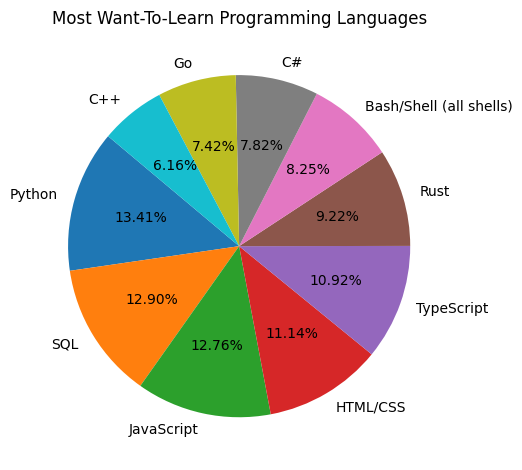

In [30]:
top_want = want_counts.head(10)
#10 most wanted language for pichart -> chosen for styling purposes, and 15+ would provide unecesary lans

plt.pie( #pichart styling
    top_want.values,
    labels=top_want.index,
    autopct="%1.2f%%",
    startangle=140
)

plt.title("Most Want-To-Learn Programming Languages")
plt.tight_layout()
plt.show()

In [26]:
lang_compare.sort_values("RatioDistance").head(25)

,WantCount,AdmireCount,Ratio,RatioDistance
HTML/CSS,697,676,1.031065,0.031065
Bash/Shell (all shells),516,487,1.059548,0.059548
SQL,807,760,1.061842,0.061842
JavaScript,798,751,1.062583,0.062583
Delphi,29,27,1.074074,0.074074
VBA,25,23,1.086957,0.086957
PHP,207,184,1.125000,0.125000
Groovy,28,24,1.166667,0.166667
Java,325,275,1.181818,0.181818
PowerShell,179,151,1.185430,0.185430


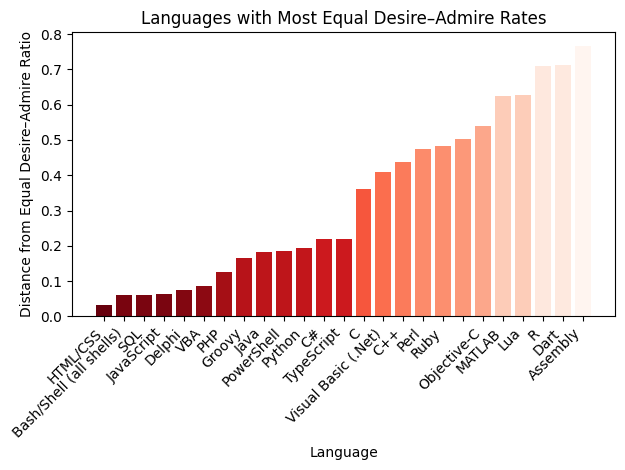

In [27]:
top_equal = lang_compare.sort_values("RatioDistance").head(25) #get 25 closest lans with 1 rate

values = top_equal["RatioDistance"].values #get heights

norm = (values - values.min()) / (values.max() - values.min()) #apply red gradient
colors = plt.cm.Reds_r(norm) #reverse gradient to show close is priority

plt.bar(top_equal.index, values, color=colors) #bar graph styling
plt.xlabel("Language")
plt.ylabel("Distance from Equal Desire–Admire Ratio")
plt.title("Languages with Most Equal Desire–Admire Rates")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Verdict: The languages that most developers want to learn include python, JS, SQL, HTML/CSS and TypeScript. While the laungauges with the higest want-interest rate (developers both want to learn, and are actually interested in  are HTML/CSS, JS, Bash/Shell, SQL and PHP. It appears a majority of the developer base wants to learn a lot of the core common laungauges that they might use daily in the workforce.

### Answering Q5: Are certain industries strongly associated with specific programming languages

In [28]:
industry_counts = salary_df["Industry"].value_counts()
industry_order = industry_counts.index.tolist() #common to l-common

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


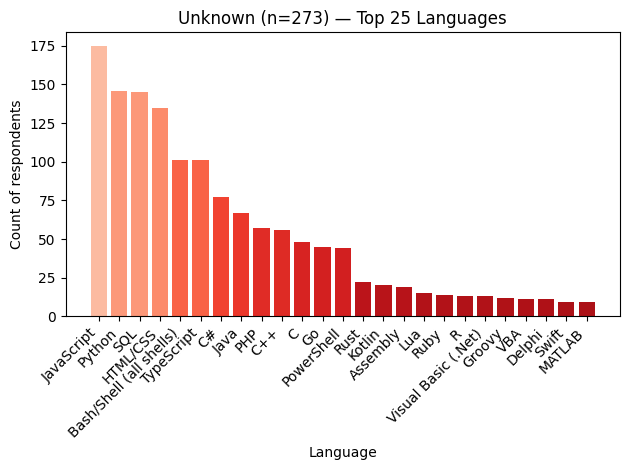

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


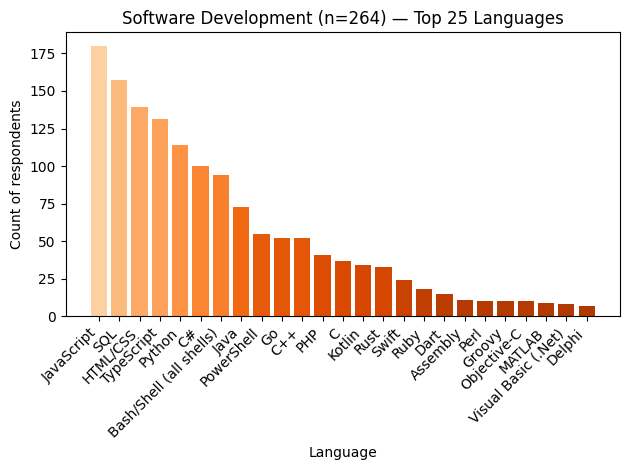

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


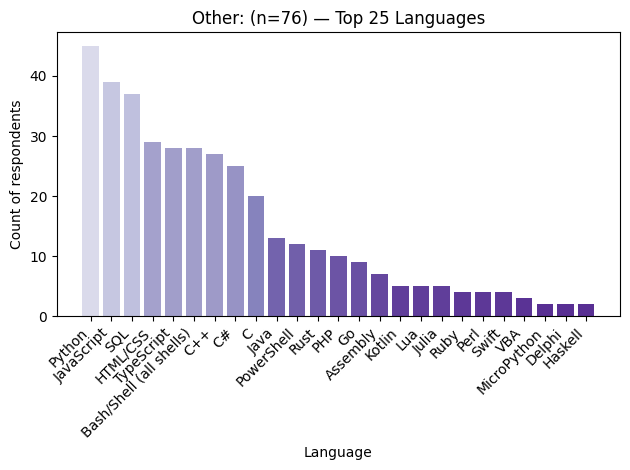

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


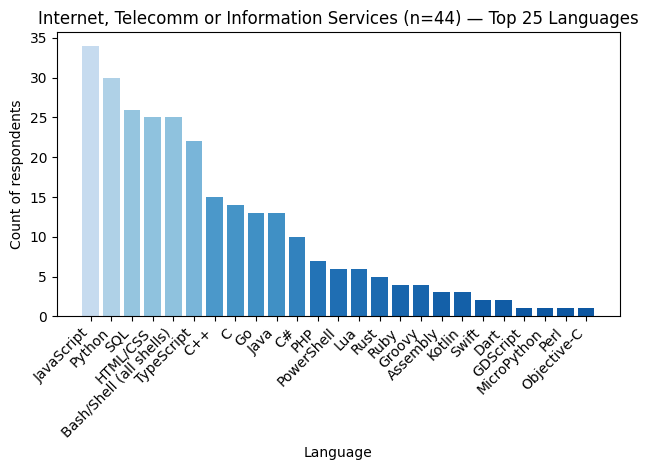

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


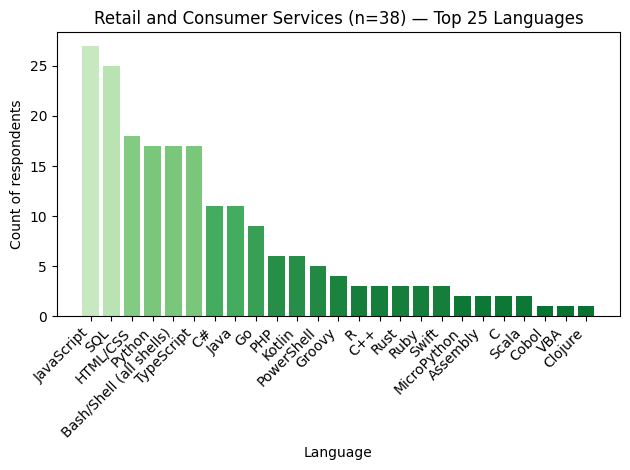

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


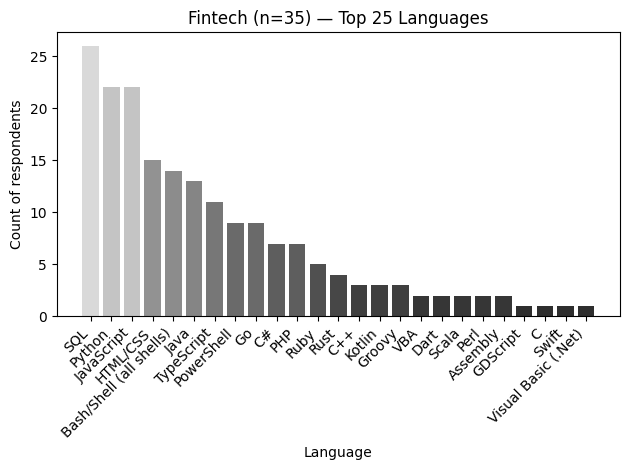

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


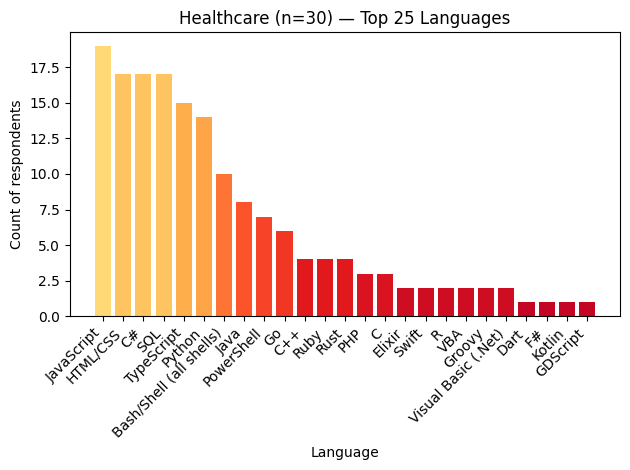

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


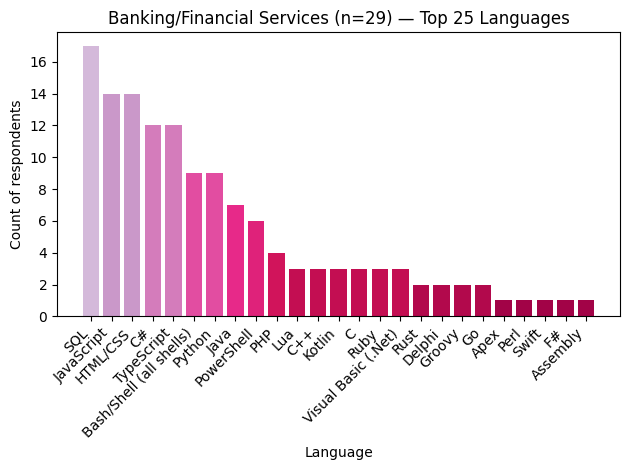

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


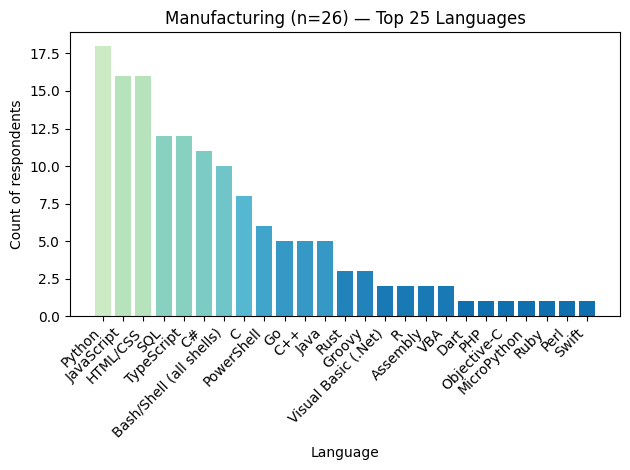

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


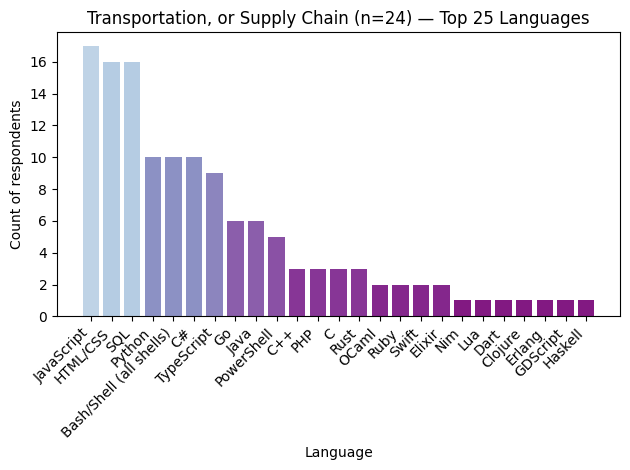

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


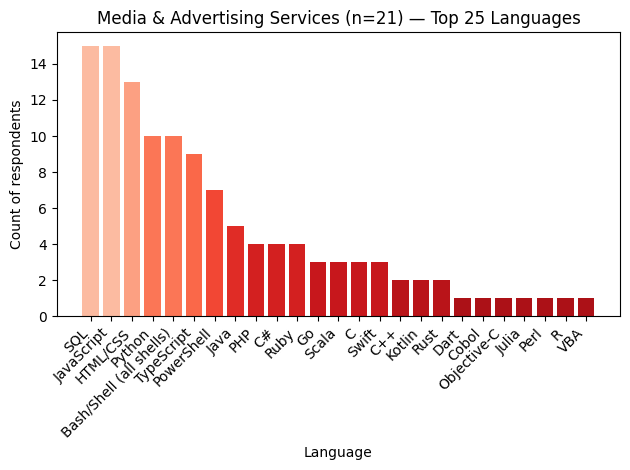

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


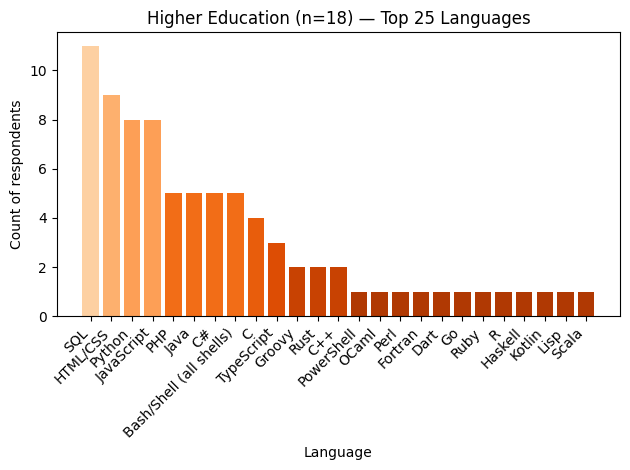

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


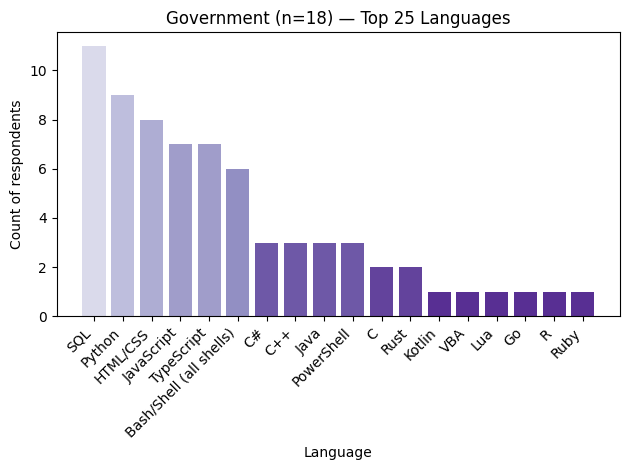

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


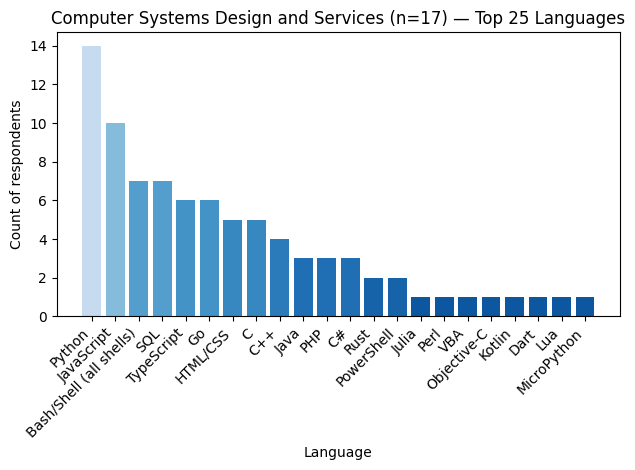

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


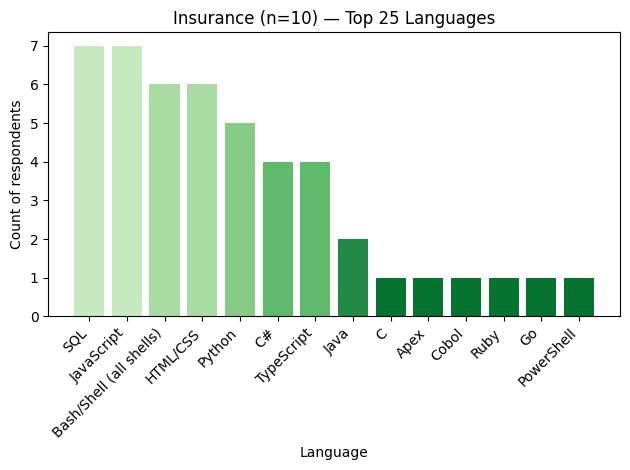

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


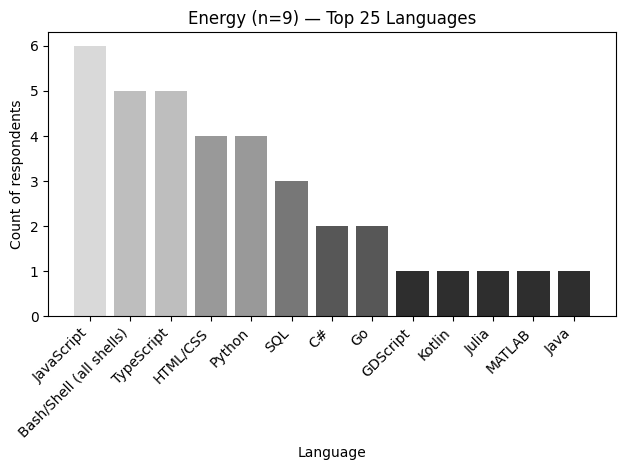

In [29]:
cmap_names = [
    "Reds", "Oranges", "Purples", "Blues", "Greens", #Used Gemini for help looping through matplotlib's cm palettes
    "Greys", "YlOrRd", "PuRd", "GnBu", "BuPu"
] #for color variation

for i, industry in enumerate(industry_order): #loop through all industries
    sub = salary_df[salary_df["Industry"] == industry] #focus to one industry

    lang_counts = (
        sub["LanguageHaveWorkedWith"] #get data on used lan
        .explode()
        .value_counts()
        .head(25) #top 25 lan in ea
    )

    cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors
    vals = lang_counts.values.astype(float)
    norm = (vals - vals.min()) / (vals.max() - vals.min() + 1e-9)
    colors = cmap(0.85 - 0.60 * norm)

    plt.bar(lang_counts.index, lang_counts.values, color=colors) #plot styling

    title_industry = "Unknown" if (industry is np.nan) else str(industry)
    plt.title(f"{title_industry} (n={len(sub)}) — Top 25 Languages")
    plt.xlabel("Language")
    plt.ylabel("Count of respondents")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    print("\n" * 2) #space inbetween ea graph


### Verdict: The top-25 language distributions reveal that industries share a strict common foundation of JS, SQL, HTML/CSS & python indicating these languages as foundational all throughout industries regardless of domain. However, certain patterns between domains begin to show through in the usage of secondary languages. Internet & Telecom roles emphaize system languages like C, C++, Go & Perl. Fintech, Health and other data driven sectors like more data statistic tools found in VBA, MATLAB and R, which follows their job theme. Roles that involve working with low-level technologies, like Supply-Chain and Government tend to use older frameworks like RubyOnRails and Delphi.